In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%notebook inline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Reading file

In [3]:
df = pd.read_csv("indian_liver_patient.csv")

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.shape

(583, 11)

In [6]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
df["Dataset"].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [8]:
df["Gender"].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [9]:
df["Dataset"].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

# Fill missing values

In [10]:
df.fillna(df.mean(), inplace=True)

In [11]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [12]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [13]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.000000,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.000000,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.300000,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.000000,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.000000,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.000000,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.600000,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.100000,3.8,5.5
Albumin_and_Globulin_Ratio,583.0,0.947064,0.318492,0.3,0.7,0.947064,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.000000,2.0,2.0


In [15]:
df.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     70
Dataset                         2
dtype: int64

# EDA

In [16]:
sns.set_style("darkgrid")

### Univariate Analysis

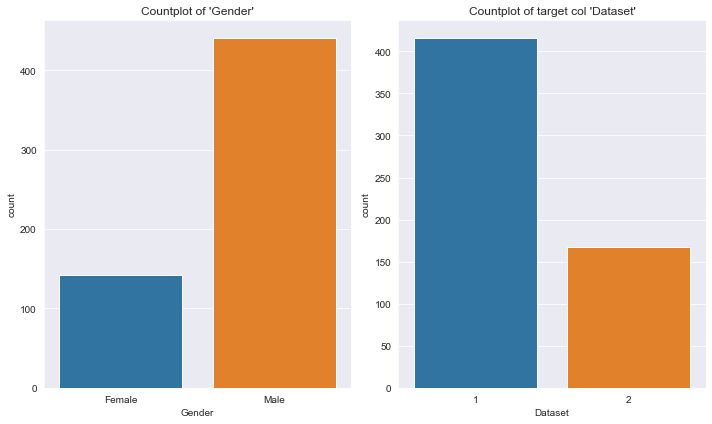

In [17]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(df["Gender"])
plt.title("Countplot of 'Gender'")

plt.subplot(1,2,2)
sns.countplot(df["Dataset"])
plt.title("Countplot of target col 'Dataset'")
plt.tight_layout()

In [18]:
cols = df.nunique()
cols.shape

(11,)

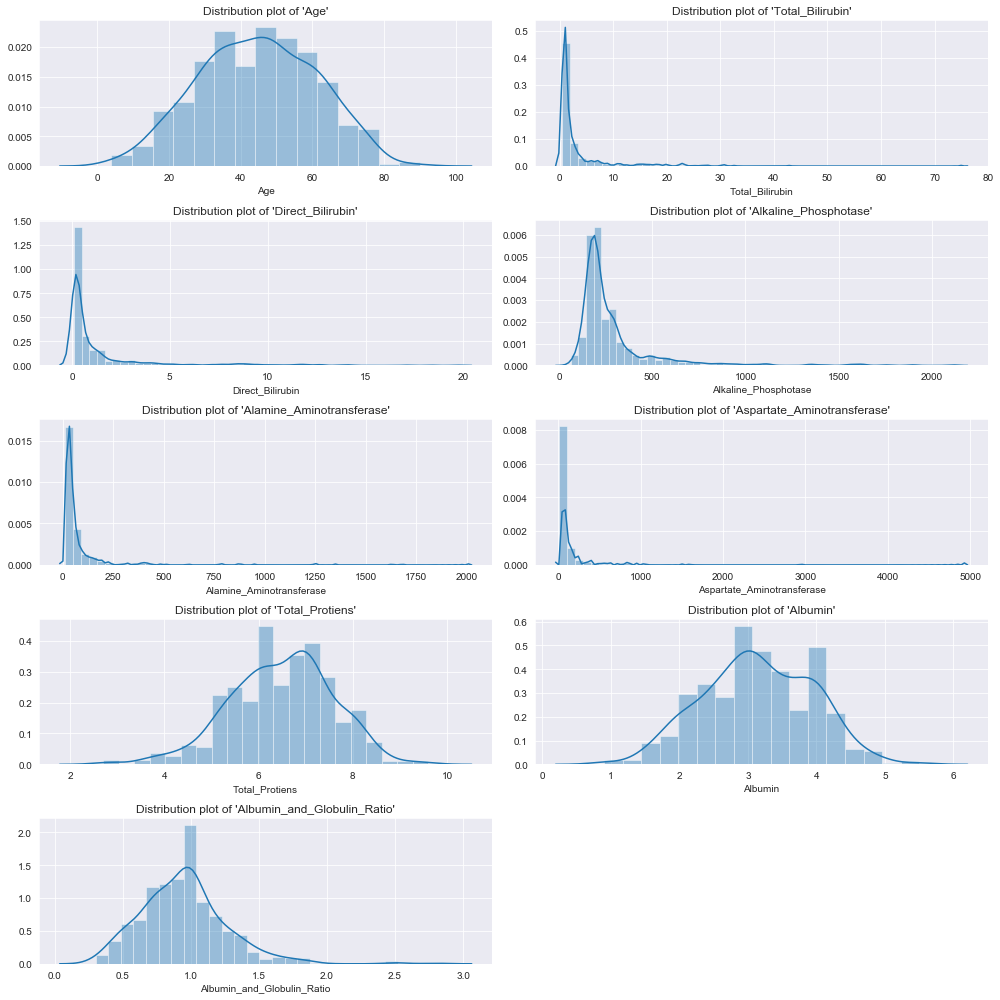

In [19]:
plt.figure(figsize=(14,14))
for i, col in enumerate(df.columns[cols>2], 1):
    plt.subplot(5,2,i)
    sns.distplot(df[col])
    plt.title("Distribution plot of '" + col + "'")
    plt.tight_layout()
    

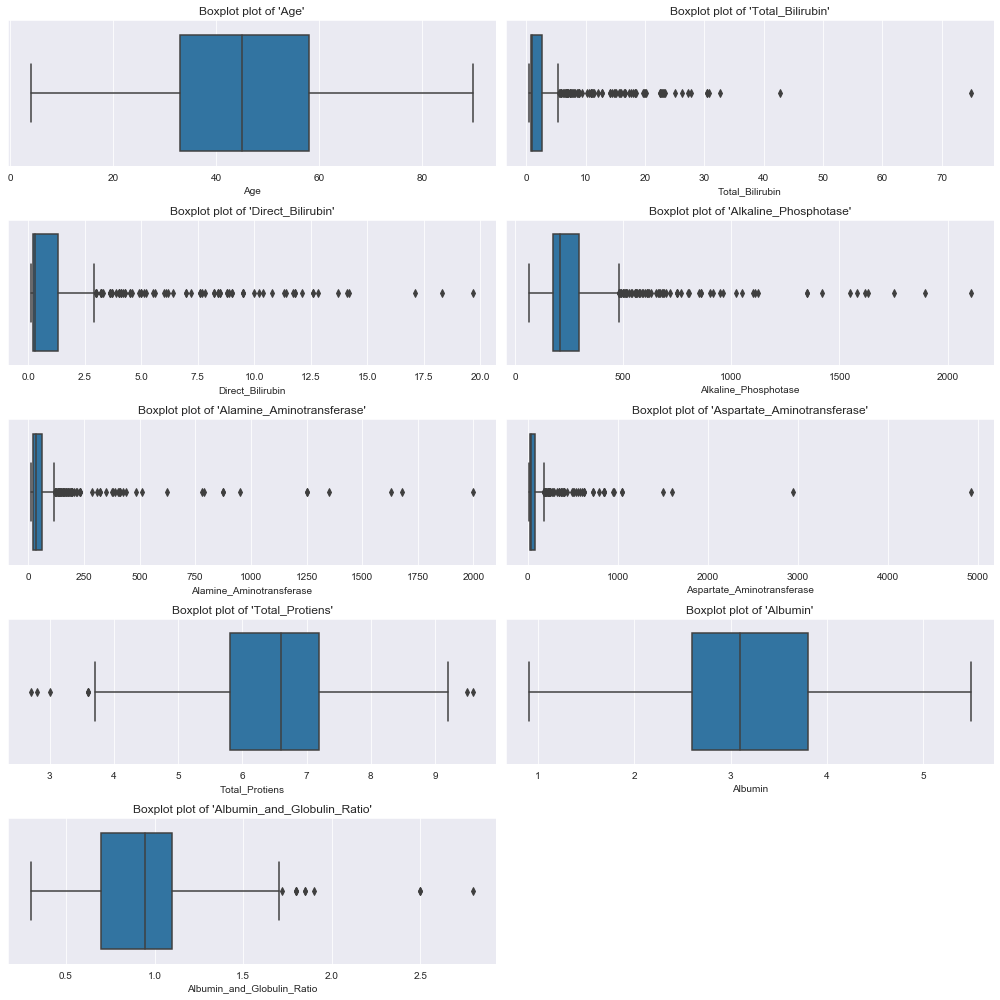

In [20]:
plt.figure(figsize=(14,14))
for i, col in enumerate(df.columns[cols>2], 1):
    plt.subplot(5,2,i)
    sns.boxplot(df[col])
    plt.title("Boxplot plot of '" + col + "'")
    plt.tight_layout()
    

### Bivariate Analysis

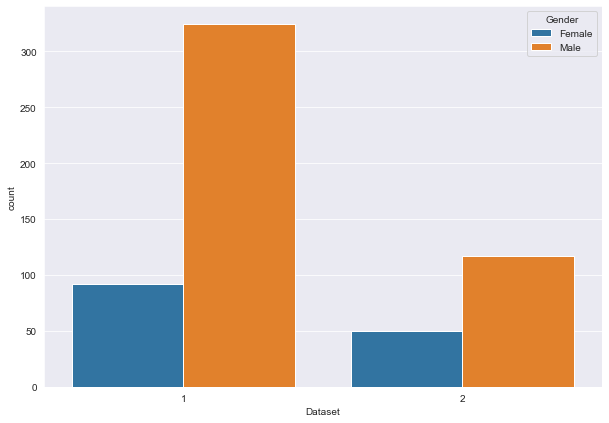

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(df["Dataset"], hue=df["Gender"])

In [22]:
df["Gender"] = df["Gender"].replace({"Female": 0, "Male": 1})

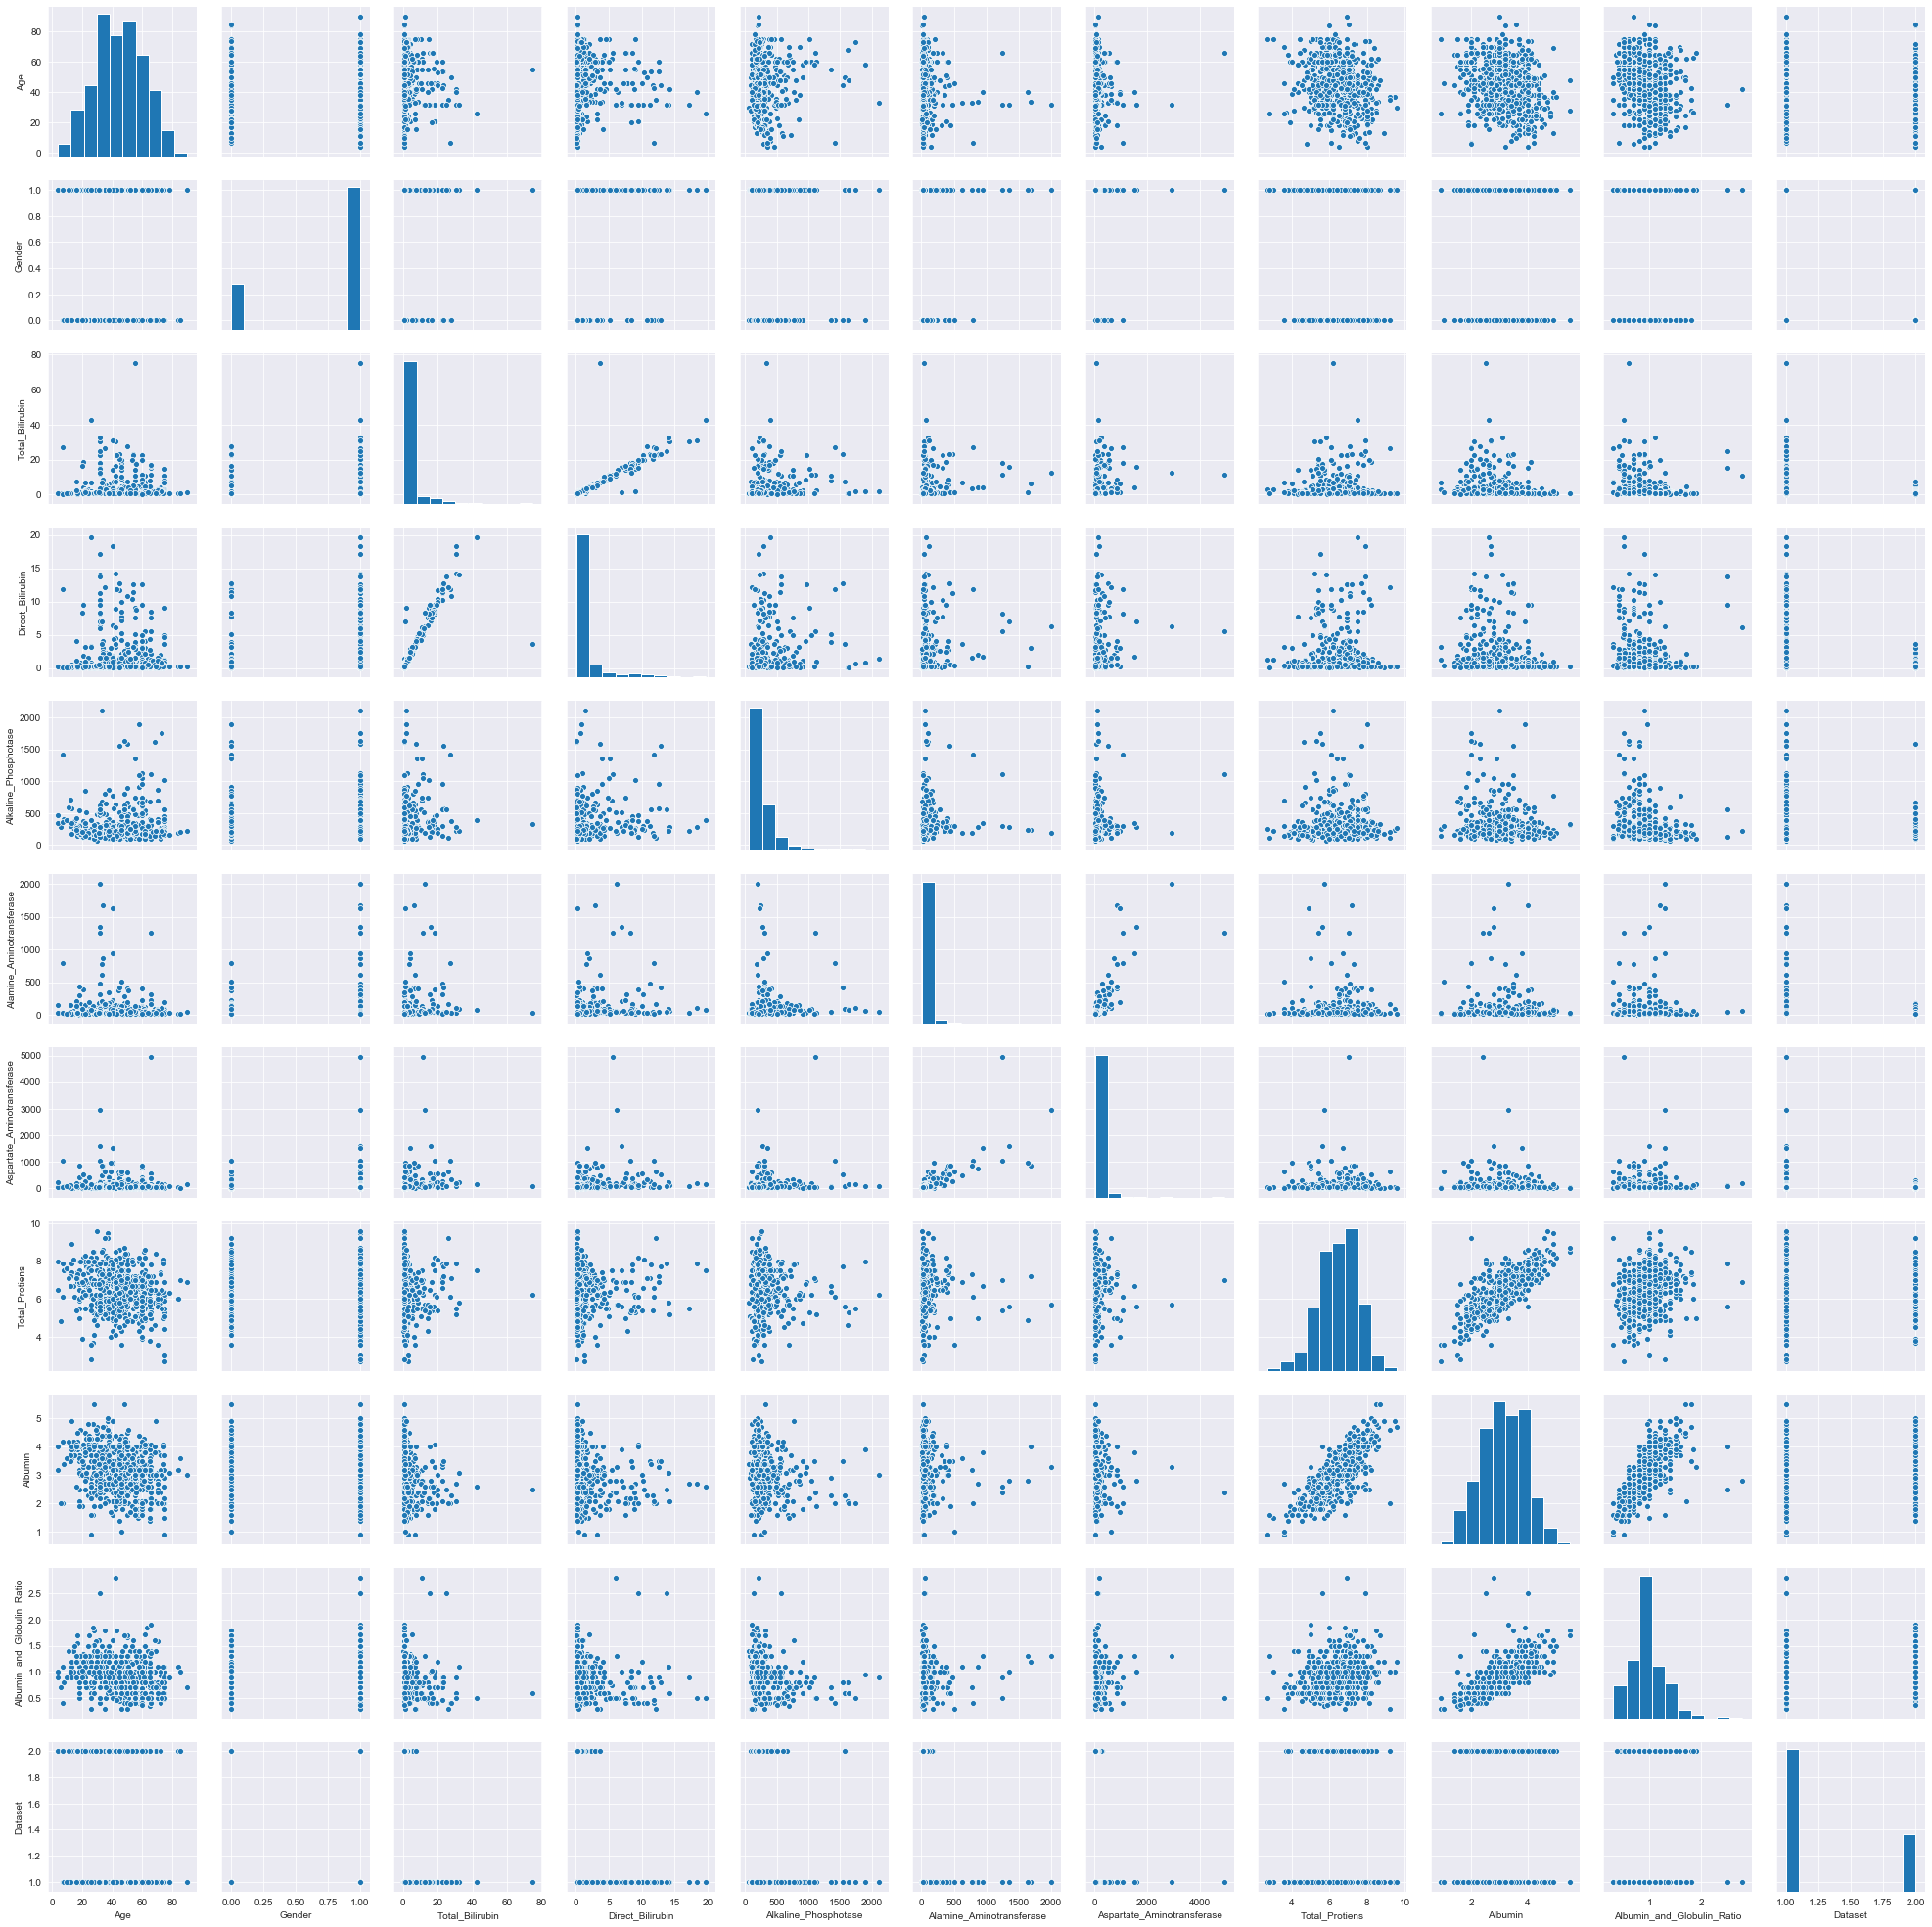

In [23]:
sns.pairplot(df)

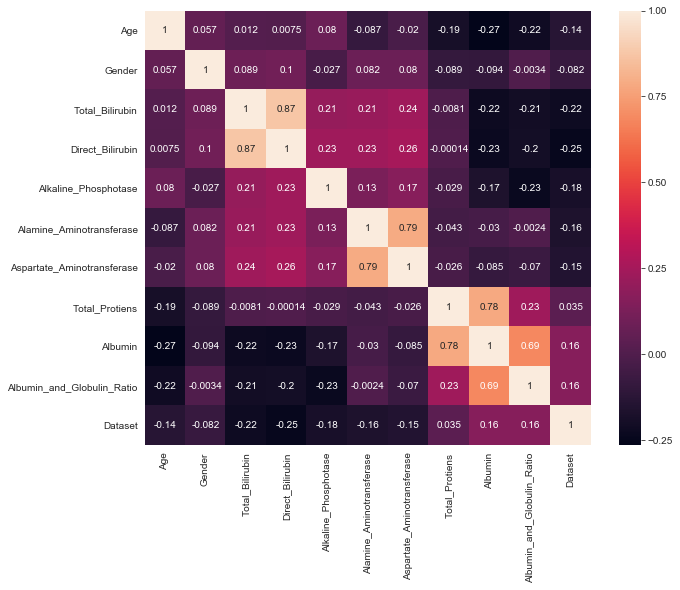

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [25]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

# Preprocessing

### Feature Selection

**From the correlateion matrix, we can see some features having multicolinearity. Lets filter them**

In [26]:
corr = df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
                
selected_columns = df.columns[columns]

In [27]:
selected_columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Total_Protiens',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

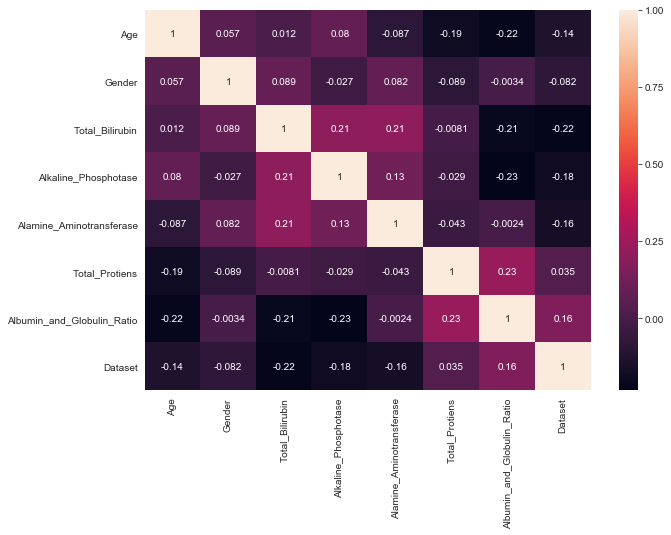

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(df[selected_columns].corr(), annot=True)

In [29]:
df1 = df.copy()

In [30]:
df1 = df1[selected_columns]

In [31]:
df1.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,187,16,6.8,0.90,1
1,62,1,10.9,699,64,7.5,0.74,1
2,62,1,7.3,490,60,7.0,0.89,1
3,58,1,1.0,182,14,6.8,1.00,1
4,72,1,3.9,195,27,7.3,0.40,1


### Outlier Treatment

**From the boxplot and distribution plot it can be clearly seen some variables have outliers. Lets convert them** 

In [32]:
def convertOutliers(col, i, df1):
    
    df = df1.copy()
    
    df["zscore" + str(i)] = ((df[col]-df[col].mean()) / df[col].std())
    
    df.loc[df["zscore" + str(i)] > 2, col] = df[col].median()
    
    return df
    

In [33]:
df2 = df1.copy()

**Taking a quick look at columns again**

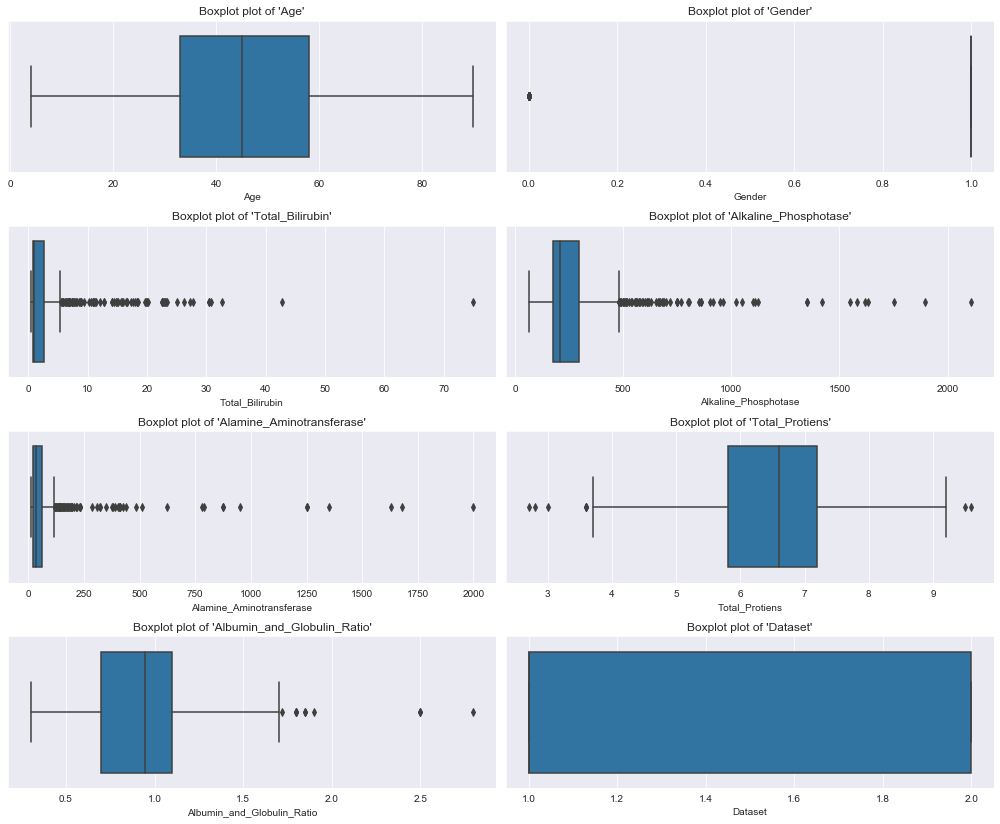

In [34]:
plt.figure(figsize=(14,14))
for i, col in enumerate(df2.columns, 1):
    plt.subplot(5,2,i)
    sns.boxplot(df2[col])
    plt.title("Boxplot plot of '" + col + "'")
    plt.tight_layout()
    

**Selecting columns to filter**

In [35]:
cols = df2.nunique()
cols

Age                            72
Gender                          2
Total_Bilirubin               113
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Total_Protiens                 58
Albumin_and_Globulin_Ratio     70
Dataset                         2
dtype: int64

In [36]:
cols_to_filter = df2.columns[cols>2]
cols_to_filter = cols_to_filter[1:]
cols_to_filter

Index(['Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Total_Protiens', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [37]:
for i,col in enumerate(cols_to_filter,1):
    print(col + "treated!")
    df2 = convertOutliers(col, i, df2) 

Total_Bilirubintreated!
Alkaline_Phosphotasetreated!
Alamine_Aminotransferasetreated!
Total_Protienstreated!
Albumin_and_Globulin_Ratiotreated!


# Building Model

### Splitting Data

In [38]:
X = df2.drop(df1.loc[:,"Dataset":], axis = 1)
y = df2["Dataset"]

sc = StandardScaler()

X = pd.DataFrame(sc.fit_transform(X), columns= X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

### Lets build a KNN Classifier first

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
print("Training Accuracy: {:.5f}".format(knn.score(X_train, y_train)))
print("Testing Accuracy: {:.5f}".format(knn.score(X_test, y_test)))

Training Accuracy: 0.81863
Testing Accuracy: 0.65714


### Try optimizing its performance

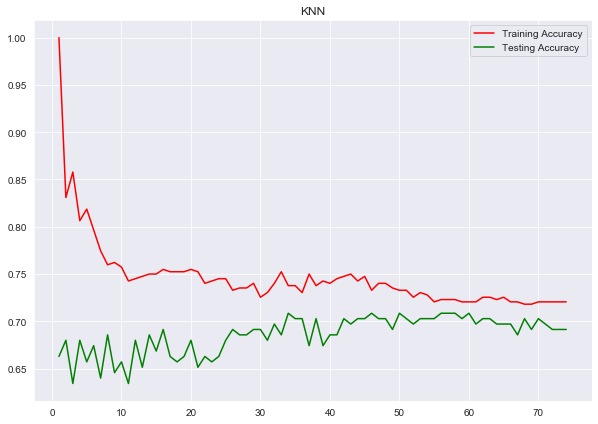

n_neighbors: 1
Training accuracy =  1.0
Testing accuracy =  0.6628571428571428


In [42]:
def knn_params():
    train_accur = []
    test_accur = []
    best_test=0
    best_train=0
    value = 0
    y=75
    x = np.arange(1,y)
    
    for i in range(1,y):
        
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train,y_train)
        
        test_accur.append(model.score(X_test,y_test))
        train_accur.append(model.score(X_train,y_train))
        
        if(model.score(X_test,y_test)>best_test and model.score(X_train,y_train)>best_train):
            value = i
            best_test = model.score(X_test,y_test)
            best_train = model.score(X_train,y_train)
    
    sns.set_style("darkgrid")
    plt.figure(figsize=(10,7))
    plt.plot(x,train_accur,'r',label='Training Accuracy')
    plt.plot(x,test_accur,'g',label='Testing Accuracy')
    plt.title("KNN")
    plt.legend(loc='best')
    plt.show()
    
    return best_test, best_train, value
    
    
best_test, best_train, value = knn_params()

print("n_neighbors:", value)
print("Training accuracy = ",best_train)
print("Testing accuracy = ",best_test)

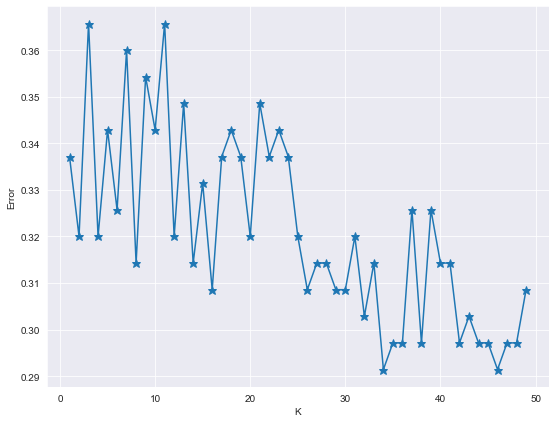

In [43]:
error = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i )
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))
    
plt.figure(figsize=(9,7))
plt.xlabel("K")
plt.ylabel("Error")
plt.plot(range(1,50), error, marker = "*" , markersize = 9)

### Lets build some other models

In [44]:
models = {
    "            Logistic Regression" : LogisticRegression(),
    "                 SVM Classifier" : SVC(gamma='auto'),
    "K Nearest Neighbours Classifier" : KNeighborsClassifier(n_neighbors=61),
    "       Random Forest Classifier" : RandomForestClassifier()
}

### Defining utility functions

In [45]:
def train():
    for name, model in models.items():
        model.fit(X_train, y_train)
        print(name + " trained.")

In [46]:
def test():
    for name, model in models.items():
        print(name)
        print("--------------------"*3)
        print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
        print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
        print("--------------------"*3)
        print('\n')    

In [47]:
def evalaluate():
    for name, model in models.items():
        print(name)
        print("\nConfusion Matrix")
        predictions = model.predict(X_test)
        print(confusion_matrix(y_test,predictions))
        print("\nClassifiation Report")
        print(classification_report(y_test,predictions))
        print("==="*40)

# Training

In [48]:
train()

            Logistic Regression trained.
                 SVM Classifier trained.
K Nearest Neighbours Classifier trained.
       Random Forest Classifier trained.


# Testing

In [49]:
test()

            Logistic Regression
------------------------------------------------------------
Testing Accuracy: 0.66857
Training Accuracy: 0.74265
------------------------------------------------------------


                 SVM Classifier
------------------------------------------------------------
Testing Accuracy: 0.69143
Training Accuracy: 0.74510
------------------------------------------------------------


K Nearest Neighbours Classifier
------------------------------------------------------------
Testing Accuracy: 0.69714
Training Accuracy: 0.72059
------------------------------------------------------------


       Random Forest Classifier
------------------------------------------------------------
Testing Accuracy: 0.69714
Training Accuracy: 0.99020
------------------------------------------------------------




# Evaluation

In [50]:
evalaluate()

            Logistic Regression

Confusion Matrix
[[103  21]
 [ 37  14]]

Classifiation Report
              precision    recall  f1-score   support

           1       0.74      0.83      0.78       124
           2       0.40      0.27      0.33        51

    accuracy                           0.67       175
   macro avg       0.57      0.55      0.55       175
weighted avg       0.64      0.67      0.65       175

                 SVM Classifier

Confusion Matrix
[[119   5]
 [ 49   2]]

Classifiation Report
              precision    recall  f1-score   support

           1       0.71      0.96      0.82       124
           2       0.29      0.04      0.07        51

    accuracy                           0.69       175
   macro avg       0.50      0.50      0.44       175
weighted avg       0.59      0.69      0.60       175

K Nearest Neighbours Classifier

Confusion Matrix
[[119   5]
 [ 48   3]]

Classifiation Report
              precision    recall  f1-score   support

      

# Hypertuning

### Logistic Regression

In [51]:
param_grid = {'penalty': ['l1', 'l2'],
              'C':[0.001,.009,0.01,.09,1,5,10,25]
             }

grid = GridSearchCV(LogisticRegression(), param_grid = param_grid)
grid.fit(X_train, y_train)
grid.best_params_

C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'penalty': 'l1'}

In [52]:
log = grid.best_estimator_

### Random Forest

In [53]:
param_grid = { 'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [10, 15, 20]
             }

grid = GridSearchCV(RandomForestClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)
grid.best_params_

C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 20}

In [54]:
forest = grid.best_estimator_

### KNN

In [55]:
param_grid = { 'leaf_size' : [2,5,7,9,11],
               'n_neighbors' : [2,5,7,9,11],
               'p' : [1,2]    
             }

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 11, 'p': 1}

In [56]:
knn = grid.best_estimator_

### SVM Classifier

In [57]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(X_train, y_train)
grid.best_params_

C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [58]:
svc  = grid.best_estimator_

In [59]:
models = {
    "            Logistic Regression" : log,
    "                 SVM Classifier" : svc,
    "K Nearest Neighbours Classifier" : knn,
    "       Random Forest Classifier" : forest
}

In [60]:
train()

            Logistic Regression trained.
                 SVM Classifier trained.
K Nearest Neighbours Classifier trained.
       Random Forest Classifier trained.


In [61]:
test()

            Logistic Regression
------------------------------------------------------------
Testing Accuracy: 0.65714
Training Accuracy: 0.74020
------------------------------------------------------------


                 SVM Classifier
------------------------------------------------------------
Testing Accuracy: 0.70857
Training Accuracy: 0.72304
------------------------------------------------------------


K Nearest Neighbours Classifier
------------------------------------------------------------
Testing Accuracy: 0.65143
Training Accuracy: 0.77206
------------------------------------------------------------


       Random Forest Classifier
------------------------------------------------------------
Testing Accuracy: 0.66286
Training Accuracy: 0.90196
------------------------------------------------------------




In [62]:
evalaluate()

            Logistic Regression

Confusion Matrix
[[102  22]
 [ 38  13]]

Classifiation Report
              precision    recall  f1-score   support

           1       0.73      0.82      0.77       124
           2       0.37      0.25      0.30        51

    accuracy                           0.66       175
   macro avg       0.55      0.54      0.54       175
weighted avg       0.62      0.66      0.64       175

                 SVM Classifier

Confusion Matrix
[[123   1]
 [ 50   1]]

Classifiation Report
              precision    recall  f1-score   support

           1       0.71      0.99      0.83       124
           2       0.50      0.02      0.04        51

    accuracy                           0.71       175
   macro avg       0.61      0.51      0.43       175
weighted avg       0.65      0.71      0.60       175

K Nearest Neighbours Classifier

Confusion Matrix
[[99 25]
 [36 15]]

Classifiation Report
              precision    recall  f1-score   support

          